In [1]:
#regression analysis
from marketlearn.learning.linear_models.linear_regression import LinearRegression, LinearRegressionMLE, LinearRegressionGD
import os

### Some Notes

- Classicial Linear Regression is a model of form: 

    $Y = f_{\theta}(X) + \epsilon$

where $f_{\theta}(X) = \theta_0 + \sum \limits _{j=1} ^{p} \theta_jX_j$

 - Notation: 

   -  $f_{\theta}(X)$ is a nx1 vector
   - $X_j$ is jth feature, containing n observations
   - $x^{i}$ is ith sample containing all features

- We see above equation can be rewriten as: 

  - $f_{\theta}(X) = \theta_0 + \theta_1X_1 + ... + \theta_pX_p$
               
  - = (1 $X_1  X_2  X_3 ... X_p$) * $Vec(\theta_i)i=1:p = \theta^T X$

  where $Vec(\theta_i)$ is a px1 vector $X = Vec(X_i)i=0:p$

  where $Vec(X_i)$ is a pxn matrix and $X_0$ is a 1xn vector of 1s

### Estimating Coefficients
- Given pairs ($x_i$,$y_i$), goal of Simple Linear Regression is to fit linear model to pairs of observation.  Hence, goal is to minimize: 

  - min RSS $= ||Y - \theta^TX|| = \epsilon^T\epsilon = \sum \epsilon^2$

  - There are various ways to achieve this.  
  - Numerically, we can use Cholesky Decomposition, QR decomposition, Maximum Likelihood Estimation, Gradient Descent Algorithm or the naive method $\hat{\theta} = (X^TX)^{-1}X^Ty$
  - QR decomposition assumes that if $A=QR$ then we seek to minimize... $min||Ax-b|| = min||Q^T(QRx - b|| = min||Rx - Q^Tb||$ where R is upper triangular, Q is orthogonal matrix
  - MLE (todo in explanation)
  - GD (todo in explanation)

### Lets Simulate and fit a regression model  

#### Note to self: 
X is always a (n_samples, p_features)

y is always (n_samples,)  a tuple array


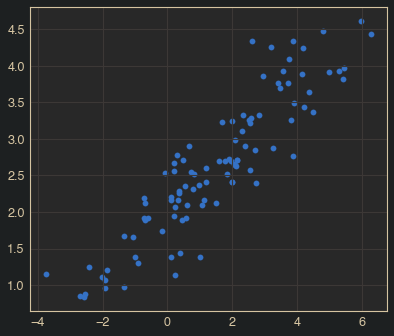

In [3]:
# single variable regression 
X = (2.5*np.random.randn(100) + 1.5)  # create standardnormal variables with mean 1.5, std = 2.5
y = (2 + 0.4 * X  + 0.4*np.random.randn(100))
X = X[:, np.newaxis]
plt.scatter(X,y)


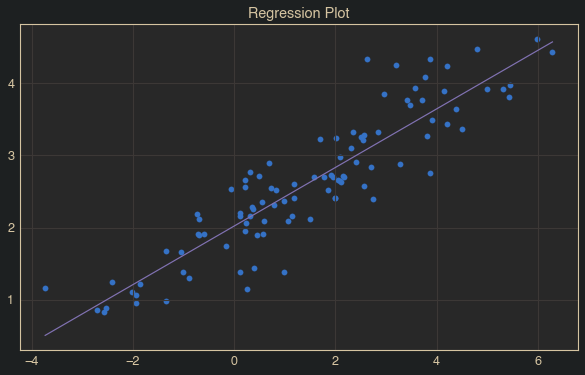

In [4]:
lr = LinearRegression()
lr.fit(X, y);
lr.reg_plot(X,y);

In [4]:
lr.theta

array([1.94304331, 0.39180754])

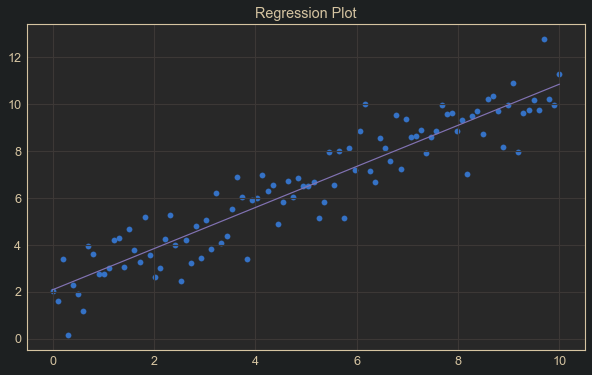

In [5]:
# anotehr way to simulate linear regression 
n_samples = 100
X = np.linspace(0, 10, 100)
y = 2 + 0.9 * X  + np.random.randn(n_samples) 
X = X[:, np.newaxis]
lr = LinearRegression()
lr.fit(X, y);
lr.reg_plot(X, y);

### Polynomial Regression
- Usually of form $y = f_{\theta}(X) + \epsilon$ where

 $f_{\theta}(X) = \theta_0 + \theta_1X_1 + \theta_2 X_2^{2} + ...  + \theta_p^{p}$

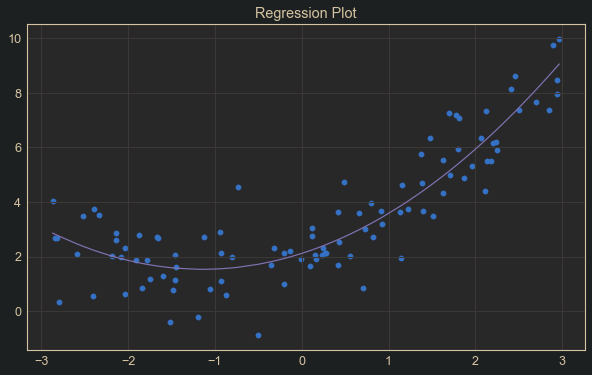

In [10]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2, include_bias=True);
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
y = y.flatten()
lr = LinearRegression(degree=2, fit_intercept=True)
lr.fit(X, y);
lr.reg_plot(X, y);

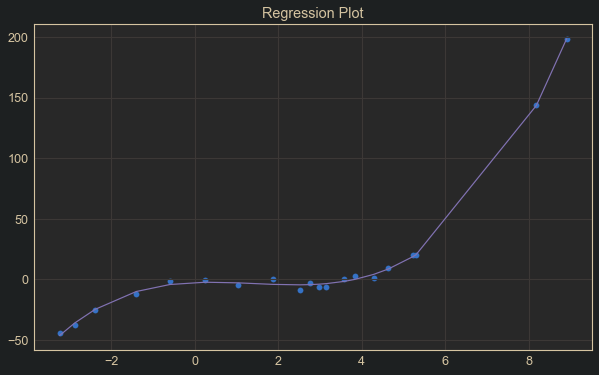

In [7]:
np.random.seed(1)
X = 2 - 3 * np.random.normal(0, 1, 20)
y = X - 2 * (X ** 2) + 0.5 * (X ** 3) + np.random.normal(-3, 3, 20)
X = X[:, np.newaxis]
lr = LinearRegression(degree=3, fit_intercept=True)
lr.fit(X, y);
lr.reg_plot(X, y);

In [3]:
gd = LinearRegressionGD(eta = 0.01, n_iter=800)
gd.fit(X, y);

In [4]:
gd.theta

array([1.93972844, 0.40574668])

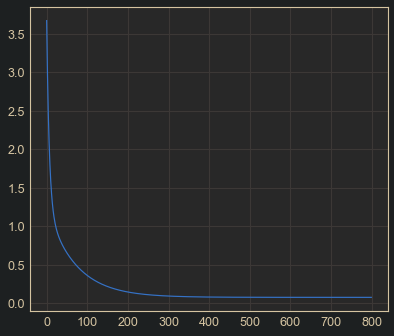

In [5]:
plt.plot(gd.cost) # pretty close

In [5]:
print(lr)